In [ ]:
#task 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pennylane as qml


In [2]:

dev = qml.device("default.qubit", wires=2)

def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
@qml.qnode(dev)
def probs():
    circuit()
    return qml.probs(wires=[0, 1])
@qml.qnode(dev)
def sv():
    circuit()
    return qml.state()


In [3]:
print("Probabilities:", probs())

Probabilities: [0.5 0.  0.  0.5]


In [4]:
print("State vector:", sv())

State vector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


(<Figure size 500x300 with 1 Axes>, <Axes: >)

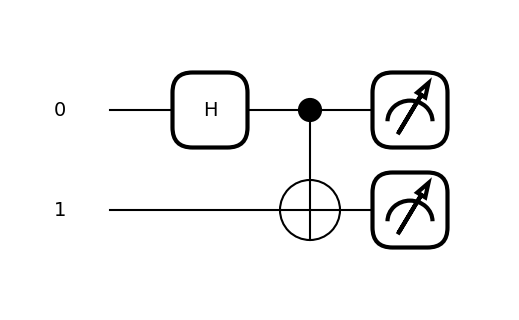

In [8]:
qml.draw_mpl(sv)()
#fig.show()


In [6]:
dev2 = qml.device("default.qubit", wires=2, shots=1000)
@qml.qnode(dev2)
def samples():
    circuit()
    return qml.sample(wires=[0, 1])


In [7]:
print("Samples:", samples()[:20])

Samples: [[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
#task2 with 4 qubits

In [13]:
dev3 = qml.device("default.qubit", wires=4)
@qml.qnode(dev3)
def circuit1():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    return qml.probs(wires=[0, 1, 2, 3])

In [14]:
print ("Probabilities for 4 qubits:", circuit1())

Probabilities for 4 qubits: [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]


(<Figure size 700x500 with 1 Axes>, <Axes: >)

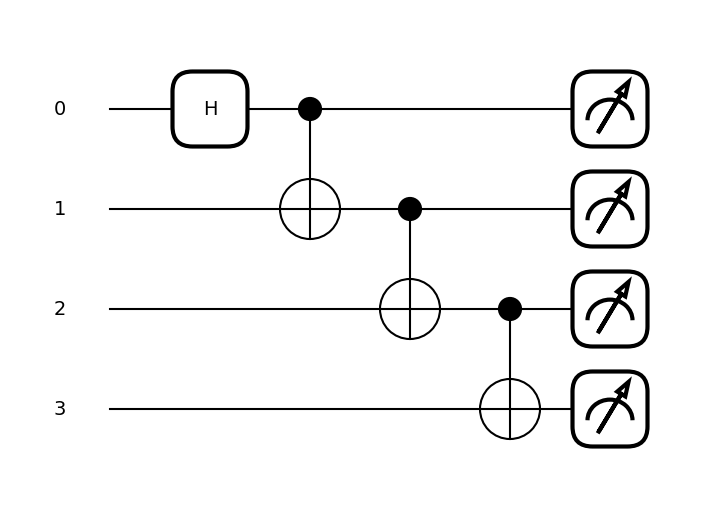

In [15]:
qml.draw_mpl(circuit1)()

In [ ]:
#task3  Rotation + Measurement Circuit

In [ ]:
def circuit3(theta):
    qml.RY(theta, wires=0)
    qml.CNOT(wires=[0, 1])             